In [ ]:
#Importing Libraries

In [6]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [7]:
#Extract Filenames from Folder

In [8]:
filenames = []
for file in os.listdir('images1'):
    
    filenames.append(os.path.join('images1',file))
    

In [9]:
len(filenames)

460

In [10]:
#Importing ResNet50 Model and Cofiguration

In [11]:
# model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
# model.trainable = False

# model = tf.keras.models.Sequential([model,
#                                    GlobalMaxPool2D()
#                                    ])
# model.summary()

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPooling2D, Input
from tensorflow.keras.models import Model

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Ensure TensorFlow can access GPU if available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Optionally configure GPU memory growth
if len(tf.config.list_physical_devices('GPU')) > 0:
    try:
        tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
    except:
        pass

# Define the input
input_tensor = Input(shape=(224, 224, 3))

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False

# Add GlobalMaxPooling2D layer
x = base_model.output
x = GlobalMaxPooling2D()(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Print the model summary
model.summary()


TensorFlow version: 2.17.0
Num GPUs Available:  0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [52]:
#Extracting Fetaures from Image

In [53]:
# img = image.load_img('16871.jpg', target_size=(224,224))
# img_array = image.img_to_array(img)
# img_expand_dim = np.expand_dims(img_array, axis=0)
# img_preprocess = preprocess_input(img_expand_dim)
# result = model.predict(img_preprocess).flatten()
# norm_result = result/norm(result)
# norm_result

In [13]:
import os
print(os.getcwd())


c:\Users\SALMA AZMEENA\Desktop\fashion


In [14]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from numpy.linalg import norm

# Specify the path to your image
img_path = r'C:/Users/SALMA AZMEENA/Desktop/fashion/images1/1163.jpg'

# Load the image
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to an array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's input shape
img_expand_dim = np.expand_dims(img_array, axis=0)

# Preprocess the input
img_preprocess = preprocess_input(img_expand_dim)

# Make a prediction
result = model.predict(img_preprocess).flatten()

# Normalize the result
norm_result = result / norm(result)

# Display the normalized result
print(norm_result)
img_array.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0.00491865 0.05812977 0.00543877 ... 0.00351522 0.05245367 0.03639519]


(224, 224, 3)

In [15]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [16]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([0.01469109, 0.0121581 , 0.01182922, ..., 0.01440578, 0.00824889,
       0.02684225], dtype=float32)

In [17]:
image_features = []
for file in filenames[0:1000]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

[array([0.01469109, 0.0121581 , 0.01182922, ..., 0.01440578, 0.00824889,
        0.02684225], dtype=float32),
 array([0.00491865, 0.05812977, 0.00543877, ..., 0.00351522, 0.05245367,
        0.03639519], dtype=float32),
 array([5.5051692e-06, 1.0178070e-01, 2.0306803e-02, ..., 2.6299639e-03,
        2.3691963e-02, 4.2438053e-02], dtype=float32),
 array([0.00368397, 0.06017026, 0.00153248, ..., 0.00427826, 0.02528008,
        0.04479659], dtype=float32),
 array([0.0147677 , 0.00762964, 0.00707825, ..., 0.        , 0.00262545,
        0.00069253], dtype=float32),
 array([0.01868856, 0.03322041, 0.00327045, ..., 0.02462126, 0.0171964 ,
        0.01381791], dtype=float32),
 array([0.        , 0.02540989, 0.        , ..., 0.02201728, 0.05976259,
        0.01438743], dtype=float32),
 array([0.        , 0.03195982, 0.        , ..., 0.00272934, 0.04561885,
        0.01183027], dtype=float32),
 array([0.01696395, 0.04771775, 0.00098639, ..., 0.01189145, 0.0396345 ,
        0.03552545], dtype=fl

In [18]:
Image_features = pkl.dump(image_features, open('Images_features old.pkl','wb'))

In [19]:
filenames = pkl.dump(filenames, open('filenames old.pkl','wb'))

In [21]:
#Loading Pickle Files

In [20]:

Image_features = pkl.load(open('Images_features old.pkl','rb')
                         )

In [21]:
filenames = pkl.load(open('filenames old.pkl','rb'))

In [22]:
np.array(Image_features).shape

(460, 2048)

In [25]:
#Finidng Simialar Images

In [23]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [24]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [25]:
input_image = extract_features_from_images(img_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [26]:
distance,indices = neighbors.kneighbors([input_image])

In [27]:
from sklearn.neighbors import NearestNeighbors

# Assuming neighbors is your NearestNeighbors instance
# and input_image is prepared and processed appropriately

# Determine the number of neighbors to find
n_neighbors = min(6, len(Image_features))  # Adjust '5' based on your dataset size

# Finding nearest neighbors
distances, indices = neighbors.kneighbors([input_image], n_neighbors=n_neighbors)

# Print or use the results
print("Nearest neighbors distances:", distances)
print("Nearest neighbors indices:", indices)


Nearest neighbors distances: [[0.         0.50214088 0.59322035 0.62313432 0.63214934 0.63298523]]
Nearest neighbors indices: [[  1   2  65 247 236 133]]


In [28]:
indices[0]

array([  1,   2,  65, 247, 236, 133], dtype=int64)

In [29]:
from IPython.display import Image

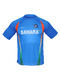

In [30]:
Image(img_path)

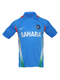

In [31]:
Image(filenames[indices[0][1]])

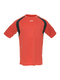

In [32]:
Image(filenames[indices[0][2]])

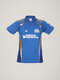

In [33]:
Image(filenames[indices[0][3]])

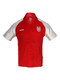

In [34]:
Image(filenames[indices[0][4]])

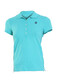

In [35]:
Image(filenames[indices[0][5]])

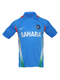

In [37]:
from IPython.display import Image

# Assuming filenames is a list of file paths to your images
# and indices is the array of indices from neighbors.kneighbors
recommended_image_index = indices[0][1]  # Adjust as needed

# Load and display the recommended image
display(Image(filename=filenames[recommended_image_index]))


In [38]:
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np

# Assuming 'dataset' contains features extracted from images
# 'input_image' is the query image you want to find nearest neighbors for

# Initialize Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')
neighbors.fit(image_features)  # Assuming dataset is preprocessed feature vectors

# Query for nearest neighbors
distances, indices = neighbors.kneighbors([input_image])

# Assuming filenames is a list of file paths to images corresponding to dataset
recommended_indices = indices[0]

# Display recommended images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(recommended_indices):
    plt.subplot(1, 5, i + 1)
    img = Image.open(filenames[idx])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Distance: {distances[0][i]:.2f}')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'